
# Final Project Submission

Please fill out:
* Student name: Thomas Hill & Jonathan Vasquez
* Student pace: Full Time
* Scheduled project review date/time: 07/31/2020
* Instructor name: Fangfang Lee
* Blog post URL:


## Importing Libraries / Data

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
import shutil

import cv2
from sklearn.metrics import confusion_matrix, f1_score, classification_report
np.random.seed(123)


#bokeh for visuals
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import Spectral6

import warnings
warnings.filterwarnings('ignore')

import os

In [112]:
print(os.listdir("../Mod_4_Final_Project/chest_xray")) #Checking the directory

['.DS_Store', 'test', 'train', 'val']


In [113]:
# setup file structure
base_dir = "../Mod_4_Final_Project/chest_xray"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [114]:
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5216
Number of images in Test is 624
Number of images in Validation is 16


## Visualizing the Data

In [115]:
# Distribution of images with different category
Categories = ["Train", "Test", "Validation"]
Subcategories = ['Normal', 'Pneumonia']

Train = [1341, 390]
Test = [3875, 8]
Validation = [234, 8]

data = {'Categories':Categories,
        'Train':Train,
        'Test':Test,
        'Validation':Validation}

x = [(categories, subcategories) for categories in Categories for subcategories in Subcategories]
counts = sum(zip(data['Train'], data['Test'], data['Validation']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts, color=Spectral6))

p = figure(x_range=FactorRange(*x), plot_height=400, plot_width=800, 
           title="Distribution of images with different category",
           tools="hover, pan, box_zoom, wheel_zoom, reset, save", tooltips= ("@x: @counts"))

p.vbar(x='x', top='counts', width=0.9, color='color', legend_field="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
output_notebook()
show(p)

Loading BokehJS ...

In [116]:
Normal = glob(train_dir + "NORMAL/*")
Pneumonia = glob(test_dir + "PNEUMONIA/*")

Display Normal Patient Images


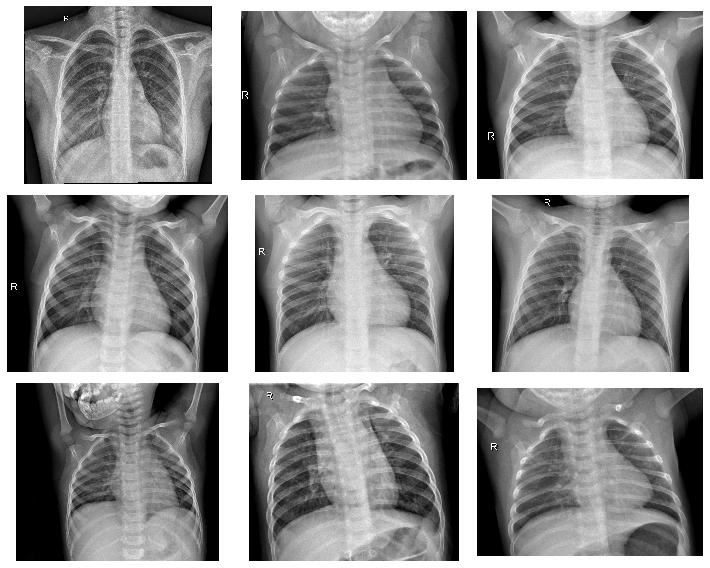

In [117]:
# Extract 9 random images from normal
random_images = [Normal[i] for i in range(9)]

print('Display Normal Patient Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

Display Pneumonia Patient Images


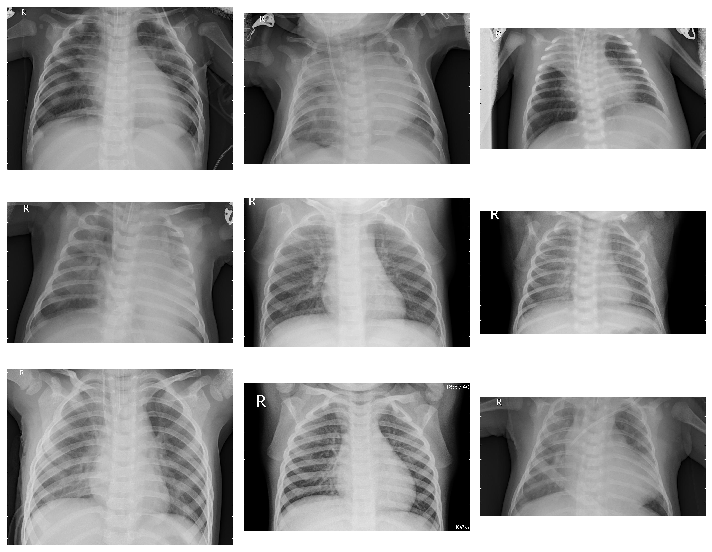

In [118]:
# Extract 9 random images from Pneumonia
random_images = [Pneumonia[i] for i in range(9)]

print('Display Pneumonia Patient Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

## Handling Imbalance

In [119]:
Normal = glob(train_dir + "NORMAL/*") + glob(test_dir + "NORMAL/*") + glob(val_dir + "NORMAL/*")
Pneumonia = glob(train_dir + "PNEUMONIA/*") + glob(test_dir + "PNEUMONIA/*") + glob(val_dir + "PNEUMONIA/*")

In [120]:
print("We have total {} Normal Images".format(len(Normal)))
print("We have total {} Pneumonia Images".format(len(Pneumonia)))

We have total 1583 Normal Images
We have total 4273 Pneumonia Images


In [121]:
# For all normal images
Train_normal = Normal[:1266]
Test_normal = Normal[1266:1424]
Validation_normal = Normal[1424:]

# For all pneumonia images
Train_pneumonia = Pneumonia[:3418]
Test_pneumonia = Pneumonia[3418:3845]
Validation_pneumonia = Pneumonia[3845:]

In [122]:
# Make new directory to store our balanced data
"""
Train
    Normal
    Pneumonia
Test
    Normal
    Pneumonia
Validation
    Normal
    Pneumonia
"""

!mkdir Train
!mkdir Test
!mkdir Validation
!mkdir Train/Normal
!mkdir Train/Pneumonia
!mkdir Test/Normal
!mkdir Test/Pneumonia
!mkdir Validation/Normal
!mkdir Validation/Pneumonia

mkdir: Train: File exists
mkdir: Test: File exists
mkdir: Validation: File exists
mkdir: Train/Normal: File exists
mkdir: Train/Pneumonia: File exists
mkdir: Test/Normal: File exists
mkdir: Test/Pneumonia: File exists
mkdir: Validation/Normal: File exists
mkdir: Validation/Pneumonia: File exists


In [123]:
# copy all images from Train_pneumonia to Train/Pneumonia
for i in Train_pneumonia:
    shutil.copy(i, "Train/Pneumonia/")
print("Copied all images from Train_pneumonia to Train/Pneumonia")
    
# copy all images from Test_pneumonia to Test/Pneumonia
for i in Test_pneumonia:
    shutil.copy(i, "Test/Pneumonia/")
print("Copied all images from Test_pneumonia to Test/Pneumonia")
    
# copy all images from Validation_pneumonia to Validation/Pneumonia
for i in Validation_pneumonia:
    shutil.copy(i, "Validation/Pneumonia/")
print("Copied all images from Validation_pneumonia to Validation/Pneumonia")

# copy all images from Train_normal to Train/Normal
for i in Train_normal:
    shutil.copy(i, "Train/Normal/")
print("Copied all images from Train_normal to Train/Normal")

# copy all images from Test_normal to Test/Normal
for i in Test_normal:
    shutil.copy(i, "Test/Normal/")
print("Copied all images from Test_normal to Test/Normal")
    
# copy all images from Validation_normal to Validation/Normal
for i in Validation_normal:
    shutil.copy(i, "Validation/Normal/")
print("Copied all images from Validation_normal to Validation/Normal")

Copied all images from Train_pneumonia to Train/Pneumonia
Copied all images from Test_pneumonia to Test/Pneumonia
Copied all images from Validation_pneumonia to Validation/Pneumonia
Copied all images from Train_normal to Train/Normal
Copied all images from Test_normal to Test/Normal
Copied all images from Validation_normal to Validation/Normal


In [124]:
# setup file structure
train_dir = "Train/"
test_dir = "Test/"
val_dir = "Validation/"

In [125]:
# check new data distribution
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 4684
Number of images in Test is 585
Number of images in Validation is 587


In [126]:
# Distribution of images with different category
Categories = ["Train", "Test", "Validation"]
Subcategories = ['Normal', 'Pneumonia']

Train = [1266, 427]
Test = [3418, 159]
Validation = [158, 428]

data = {'Categories':Categories,
        'Train':Train,
        'Test':Test,
        'Validation':Validation}

x = [(categories, subcategories) for categories in Categories for subcategories in Subcategories]
counts = sum(zip(data['Train'], data['Test'], data['Validation']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts, color=Spectral6))

p = figure(x_range=FactorRange(*x), plot_height=400, plot_width=800, 
           title="Distribution of images with different category",
           tools="hover, pan, box_zoom, wheel_zoom, reset, save", tooltips= ("@x: @counts"))

p.vbar(x='x', top='counts', width=0.9, color='color', legend_field="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
output_notebook()
show(p)

Loading BokehJS ...

In [127]:
# image preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rotation_range = 30
                                  )
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = "binary")
validation_generator = val_datagen.flow_from_directory(val_dir,
                                          target_size = (64, 64),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 4684 images belonging to 2 classes.
Found 587 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
